Pandas Practice
====


![IRIS, https://github.com/simonava5/fishers-iris-data](images/iris.png)


Fisher's Iris Data

In [93]:
reset -sf

In [95]:
# reset: a function to clear the namespace (-f: forced without further confirmation, -s: soft, history still remains intact)
# reset is only possible, if it is the first command!
reset -sf

NameError: name 'reset' is not defined

In [126]:
import pandas as pd
import numpy as np

In [97]:
iris = pd.read_csv('data/iris.csv')

In [99]:
# check out, if there are null-values
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

How many irises are the data set?

In [100]:
# 150 rows
iris.shape

(150, 5)

Calculate the mean, median, mode for petal length

In [102]:
print(f"mean: {iris['petal_length'].mean()}")
print(f"mode: {iris['petal_length'].mode()}")
print(f"median: {iris['petal_length'].median()}")

#iris["petal_length"].mode()

mean: 3.758666666666666
mode: 0    1.5
dtype: float64
median: 4.35


What can you conclude about the distribution for petal length?

In [103]:
# the values are distributed around a mean of 3.75, with a standard deviation of +/- 1.76. 
# The distribution seems to be left skewed.

What is the smallest and largest value for petal lenth?

In [41]:
print(iris["petal_length"].nlargest(1))
print(iris["petal_length"].nsmallest(1))


118    6.9
Name: petal_length, dtype: float64
22    1.0
Name: petal_length, dtype: float64


Calculate the variance and standard deviation for petal length

In [43]:
print(iris["petal_length"].std())
print(iris["petal_length"].var())

1.7644204199522626
3.113179418344519


Calculate the basic descriptive statistics for all columns of the iris data set with a single command.

In [44]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


What is the overall average for _sepal length_?

In [45]:
iris["sepal_length"].mean()


5.843333333333334

Use DataFrame grouping function to determine the count by species.

In [110]:
# groupby worked on complete dataset. Afterwards count-method only applied to "species"-column
iris.groupby("species")["species"].count()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Use DataFrame grouping function to determine the average length and width of sepals and pedals by species.

In [57]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Add the sum of the sepal width and length as a new column to your data frame.

In [59]:
iris["sepal_size"] = iris["sepal_length"] + iris["sepal_width"]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_size
0,5.1,3.5,1.4,0.2,Iris-setosa,8.6
1,4.9,3.0,1.4,0.2,Iris-setosa,7.9
2,4.7,3.2,1.3,0.2,Iris-setosa,7.9
3,4.6,3.1,1.5,0.2,Iris-setosa,7.7
4,5.0,3.6,1.4,0.2,Iris-setosa,8.6


Visualize petal length with a histogram

<AxesSubplot:>

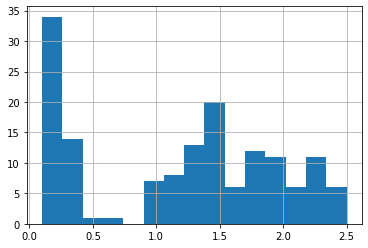

In [118]:
import matplotlib.pyplot as plt

%matplotlib inline

#iris["petal_width"].plot(kind="hist", bins=15)

#even easier, but not exactly the same layout!
iris["petal_width"].hist(bins=15)



Describe the distribution

In [71]:
# The values are not normally distributed. Very obvious is the gab between values 2 and 3. 
# The values lower then 2 seems to be outliers and require further investigation.

Which is more informative the summary statistics or visualizations?

In [119]:
# It's the combination of both that has the best effect. The summary statistics gives us a 
# proper general overview about tendencies and distribution. But only the visualitions shows us the outlyers of the data set.

Visualize petal length and width with a "scatter_matrix"

array([[<AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_width'>]],
      dtype=object)

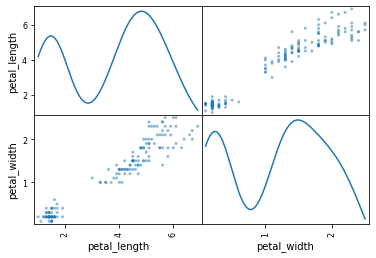

In [122]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris[["petal_length", "petal_width"]], diagonal="kde" )

Describe the joint distribution

In [130]:
# WIE HABT IHR DAS GELÖST??

numBins = 10  # number of bins in each dimension
petal_l = iris["petal_length"].values
petal_w = iris["petal_width"].values
data = np.array([petal_l, petal_w])
jointProbs, edges = np.histogramdd(data, bins=numBins)
jointProbs /= jointProbs.sum()

ValueError: sequence too large; cannot be greater than 32

Create a new column with a rough estimate of petal area by multiplying petal length and width together.

In [132]:
iris["petal_area"] = iris["petal_length"] * iris["petal_width"]
iris.sample(50)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
44,5.1,3.8,1.9,0.4,Iris-setosa,0.76
41,4.5,2.3,1.3,0.3,Iris-setosa,0.39
55,5.7,2.8,4.5,1.3,Iris-versicolor,5.85
96,5.7,2.9,4.2,1.3,Iris-versicolor,5.46
12,4.8,3.0,1.4,0.1,Iris-setosa,0.14
133,6.3,2.8,5.1,1.5,Iris-virginica,7.65
52,6.9,3.1,4.9,1.5,Iris-versicolor,7.35
124,6.7,3.3,5.7,2.1,Iris-virginica,11.97
14,5.8,4.0,1.2,0.2,Iris-setosa,0.24
121,5.6,2.8,4.9,2.0,Iris-virginica,9.80


---- 
Challenge Exercises
----

Create a new dataframe with petal areas greater than $1cm^2$.

In [133]:
df = iris.query("petal_area > 1.0")


Create 3 new dataframes, one for each species. Use the entire dataset.

In [142]:
# Solved via dictionary comprehension!
species_dfs = {"df_"+key : value for key, value in df.groupby("species")}
species_dfs["df_Iris-versicolor"]


,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
50,7.0,3.2,4.7,1.4,Iris-versicolor,6.58
51,6.4,3.2,4.5,1.5,Iris-versicolor,6.75
52,6.9,3.1,4.9,1.5,Iris-versicolor,7.35
53,5.5,2.3,4.0,1.3,Iris-versicolor,5.20
54,6.5,2.8,4.6,1.5,Iris-versicolor,6.90
55,5.7,2.8,4.5,1.3,Iris-versicolor,5.85
56,6.3,3.3,4.7,1.6,Iris-versicolor,7.52
57,4.9,2.4,3.3,1.0,Iris-versicolor,3.30
58,6.6,2.9,4.6,1.3,Iris-versicolor,5.98
59,5.2,2.7,3.9,1.4,Iris-versicolor,5.46


In [156]:
# get_group method still existing???
gob = df.groupby("sepal_length").count()



sepal_length
4.9    2
5.0    2
5.1    1
5.2    1
5.4    1
5.5    5
5.6    6
5.7    6
5.8    6
5.9    3
6.0    6
6.1    6
6.2    4
6.3    9
6.4    7
6.5    5
6.6    2
6.7    8
6.8    3
6.9    4
7.0    1
7.1    1
7.2    3
7.3    1
7.4    1
7.6    1
7.7    4
7.9    1
Name: sepal_width, dtype: int64


<br>
<br> 
<br>

----